<a href="https://colab.research.google.com/github/MonkAbhishek/NLP/blob/master/Step_by_Step_Understanding_of_Transformer_model_Architecture_Using_small_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

let's open the hood of the Transformer model and get our hands dirty in
Python to illustrate the architecture we just explored in order to visualize the model
in code and show it with intermediate images

In [1]:
import numpy as np
from scipy.special import softmax

The input of the attention mechanism we are building is scaled down to dmodel = 4 instead of d model = 512. 
This brings the dimensions of the vector of an input x down to d model = 4, which is easier to visualize. x contains 3 inputs with 4 dimensions each instead of 512:

In [4]:
print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0], # Input 1
[0.0, 2.0, 0.0, 2.0], # Input 2
[1.0, 1.0, 1.0, 1.0]]) # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


Step 2: Initializing the weight matrices
Each input has 3 weight matrices:

• Q
w to train the queries

• K
w to train the keys

• V
w
to train the values

These 3 weight matrices will be applied to all the inputs in this model.
The weight matrices described by Vaswani et al. (2017) are dk = 64 dimensions.
However, let's scale the matrices down to dk = 3. The dimensions are scaled down to
3*4 weight matrices to be able to visualize the intermediate results more easily and
perform dot products with the input x.
The three weight matrices are initialized starting with the query weight matrix:

In [7]:
print("Step 2: weights 3 dimensions x d_model=4")
print("w_query") #weight for Query
w_query =np.array([[1, 0, 1],
[1, 0, 0],
[0, 0, 1],
[0, 1, 1]])
print(w_query)

Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


In [8]:
print("w_key") #weight for Key
w_key =np.array([[0, 0, 1],
[1, 1, 0],
[0, 1, 0],
[1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


In [9]:
print("w_value")#weight for Value
w_value = np.array([[0, 2, 0],
[0, 3, 0],
[1, 0, 3],
[1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


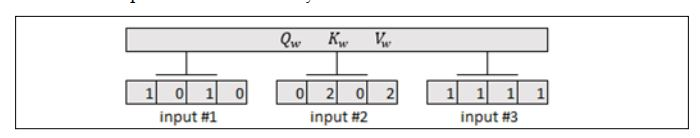

Step 3: Matrix multiplication to obtain Q, K, V
We will now multiply the input vectors by the weight matrices to obtain a query,
key, and value vector for each input.
In this model, we will assume that there is one w_query, w_key, and w_value weight
matrix for all inputs. Other approaches are possible.
Let's first multiply the input vectors by the w_query weight matrix:


In [10]:
print("Step 3: Matrix multiplication to obtain Q,K,V")
print("Query: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Query: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [11]:
#We now multiply the input vectors by the w_key weight matrix:
print("Key: x * w_key")
K=np.matmul(x,w_key)
print(K)

Key: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [20]:
#We now multiply the input vectors by the w_key weight matrix:
print("Key: x * w_value")
V=np.matmul(x,w_value)
print(V)

Key: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


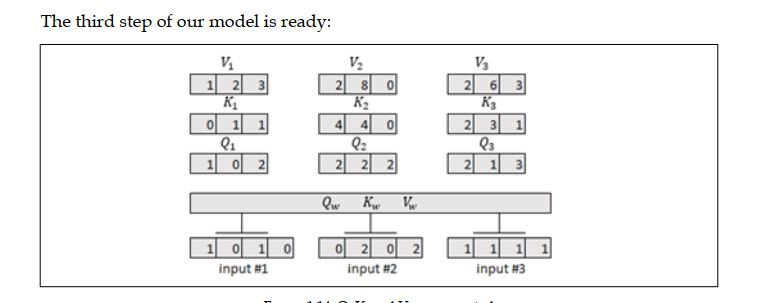

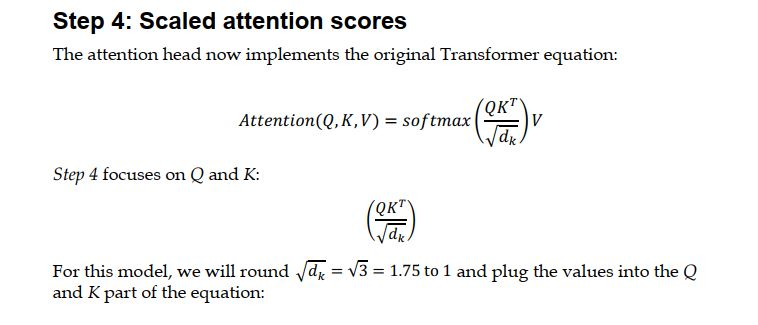

In [13]:
print("Step 4: Scaled Attention Scores")
k_d = 1 #square root of k_d=3 rounded down to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


In [14]:
# Step 5: Scaled softmax attention scores for each vector
# We now apply a softmax function to each intermediate attention score. Instead of
# doing a matrix multiplication, let's zoom down to each individual vector:
print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


**Softmax function**

The **softmax function** transforms each element of a collection by computing the exponential of each element divided by the sum of the exponentials of all the elements. That is, if x is a one-dimensional numpy array:

**softmax(x) = np.exp(x)/sum(np.exp(x))**

In [18]:
val = [2,4,4]
val = np.exp(val)/sum(np.exp(val))
val.sum()

1.0

In [21]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)
print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)
print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


In [23]:
print("Step7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


We have seen the attention representation process in detail with a small model.
Let's go directly to the result and assume we have generated the 3 attention
representations with a dimension of dmodel = 64:

In [25]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper.We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[0.18338305 0.53957175 0.08420756 0.84276813 0.69238214 0.18275223
  0.59984447 0.79828382 0.12284842 0.37269233 0.38053403 0.60263953
  0.79665175 0.25939481 0.40885386 0.46484726 0.784248   0.30557446
  0.87824581 0.35096914 0.58449372 0.8335907  0.61577402 0.20770083
  0.52862981 0.00325997 0.00549684 0.50059154 0.85746215 0.94937891
  0.99876834 0.96034781 0.23609991 0.65001196 0.21095895 0.96078679
  0.59586349 0.79840059 0.89581982 0.97847247 0.89763275 0.57926335
  0.21737858 0.36609355 0.71500492 0.35099613 0.06443725 0.85950776
  0.62921683 0.73094518 0.05685907 0.67489015 0.17133463 0.57785236
  0.04116621 0.9919482  0.2614105  0.39679371 0.1019071  0.9009646
  0.8657603  0.07414779 0.02206587 0.11642375]
 [0.46013311 0.93213731 0.663285   0.91020813 0.91228066 0.77088068
  0.0444665  0.7931197  0.94006251 0.49006159 0.32764665 0.65192016
  0.20982757 0.37900062 0.57845981 0.36793357 0.35979014 0.28567339
  0.39315486 0.13018794 0.283547

Step 9: The output of the heads of the attention sub-layer
We assume that we have trained the 8 heads of the attention sub-layer. The
transformer now has 3 output vectors (of the 3 input vectors that are words or word
pieces) of dmodel = 64 dimensions each:

In [26]:

print("Step 9: We assume we have trained the 8 heads of the attention \
sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer
shape of one head (3, 64) dimension of 8 heads 512
